# Single-rotor Noise Example

In [1]:
using Revise

import CSV
using PyPlot

import FLOWUnsteady

# Aliases
uns = FLOWUnsteady
vlm = FLOWUnsteady.vlm
noise = FLOWUnsteady.noise
gt = FLOWUnsteady.gt

# Create temps folder
if ispath("temps")==false; mkdir("temps"); end;

┌ Warning: no Manifest.toml file found, static paths used
└ @ Revise /home/edoalvar/.julia/packages/Revise/tV8FE/src/Revise.jl:1309


This notebook contains an example on how to run an aeroacoustic analysis using FLOWUnsteady coupled with PSU-WOPWOP. In here we show how to generate the aerodynamic solution, how to format the solution for PSU-WOPWOP (PSW, for short), run PSW to get tonal noise, use BPM to get broadband noise, and how the outputs can be visualized in Paraview and processed in a variety of forms.

## Test Case

The example shown here consists of an isolated 9.4in rotor in hover. The rotor and configuration matches the DJI 9443 propeller described in Zawodny, N. S., & Boyd, Jr., D. D., (2016), *Acoustic Characterization and Prediction of Representative, Small-scale Rotary-wing Unmanned Aircraft System Components*. See also the results shown in Alvarez, E. J., Schenk, A., Critchfield, T., and Ning, A., (2020), *Rotor-on-Rotor Aeroacoustic Interactions of Multirotor in Hover*.

Here is what the actual DJI 9443 rotor looks like:

<img src="img/dji9443_00.png" alt="Pic here" width="300px">

This is the output of our example:

<img src="vid/dji9443_ccblade01_1.gif" alt="Vid here" width="700px">

## Step 1: Aerodynamic Solution

In this step, we use any of the aerodynamic solvers in FLOWUnsteady to generate the aerodynamic loading and rotor geometry. In this example we are using the quasi-steady solver that uses blade-element momentum theory (BEMT) to generate the aerodynamic solution shown below. The BEMT solution predicts a $C_T$ of 0.0734, meanwhile Zawodny et al. reports an experimental $C_T$ of 0.0719. This results in a discrepancy of only 2\% between FLOWUnsteady and the experimental $C_T$.

<img src="vid/dji9443_single_bemnoise_00_ww_1.gif" alt="Vid here" width="900px">

	Generating geometry...
	Generating airfoils...

Angle		Cl		Cd		Cm		Converged
0.000000	-0.014926	0.105947	-0.007908	1
-1.000000	-0.056689	0.104379	-0.014181	1
-2.000000	-0.098111	0.103717	-0.020636	1
-3.000000	-0.137255	0.104153	-0.027136	1
-4.000000	-0.169781	0.106101	-0.033548	1
-5.000000	-0.185221	0.110584	-0.039786	1
-6.000000	-0.170004	0.119092	-0.045112	1
-7.000000	-0.144512	0.129792	-0.047222	1
-8.000000	-0.135694	0.139245	-0.047179	1
-9.000000	-0.142772	0.147267	-0.046204	1
-10.000000	-0.159889	0.154573	-0.044488	1
-11.000000	-0.183774	0.161627	-0.042019	1
-12.000000	-0.212600	0.168726	-0.038764	1
-13.000000	-0.245253	0.176069	-0.034691	1
-14.000000	-0.280933	0.183803	-0.029779	1
-15.000000	-0.319026	0.192050	-0.024015	1
-16.000000	-0.359087	0.200905	-0.017384	1
-17.000000	-0.400758	0.210453	-0.009876	1
-18.000000	-0.443745	0.220765	-0.001484	1
-19.000000	-0.487814	0.231896	0.007789	0
-20.000000	-0.532783	0.243899	0.017936	0

Angle		Cl		Cd		Cm		Converged
0.000000	-0.014926	0.10

3.000000	0.793250	0.033509	-0.125104	1
4.000000	0.868915	0.039114	-0.122728	1
5.000000	0.996834	0.039507	-0.119863	1
6.000000	1.120782	0.038311	-0.112867	1
7.000000	1.226394	0.036224	-0.101858	1
8.000000	1.283961	0.034228	-0.085365	1
9.000000	1.340662	0.037719	-0.075657	1
10.000000	1.386031	0.042997	-0.066624	1
11.000000	1.385802	0.049820	-0.053933	1
12.000000	1.348947	0.062247	-0.044345	1
13.000000	1.340240	0.076954	-0.039935	1
14.000000	1.274524	0.102458	-0.046114	1
15.000000	1.179711	0.139455	-0.064813	0
16.000000	1.095906	0.190260	-0.095020	1
17.000000	1.087961	53.436869	-0.145969	0
18.000000	0.799590	0.211709	-0.084801	0
19.000000	0.800423	0.223341	-0.088782	1
20.000000	0.810977	0.237043	-0.092040	0

Angle		Cl		Cd		Cm		Converged
0.000000	-0.057576	0.041007	-0.004201	1
-1.000000	-0.160918	0.049009	0.000423	1
-2.000000	-0.179634	0.059779	-0.018027	1
-3.000000	-0.233950	0.072175	-0.021397	1
-4.000000	-0.302599	0.082993	-0.013515	1
-5.000000	-0.338361	0.097734	-0.016331	1
-6.000000	-0

/home/edoalvar/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


*******************************************************************
START temps/dji9443_single_bemnoise_00/singlerotor	2020-07-07T14:34:30.936
*******************************************************************
Time step 0 out of 1200 	Particles: 0
Time step 10 out of 1200 	Particles: 0
Time step 20 out of 1200 	Particles: 0
Time step 30 out of 1200 	Particles: 0
Time step 40 out of 1200 	Particles: 0
Time step 50 out of 1200 	Particles: 0
Time step 60 out of 1200 	Particles: 0
Time step 70 out of 1200 	Particles: 0
Time step 80 out of 1200 	Particles: 0
Time step 90 out of 1200 	Particles: 0
Time step 100 out of 1200 	Particles: 0
Time step 110 out of 1200 	Particles: 0
Time step 120 out of 1200 	Particles: 0
Time step 130 out of 1200 	Particles: 0
Time step 140 out of 1200 	Particles: 0
Time step 150 out of 1200 	Particles: 0
Time step 160 out of 1200 	Particles: 0
Time step 170 out of 1200 	Particles: 0
Time step 180 out of 1200 	Particles: 0
Time step 190 out of 1200 	Particles: 0


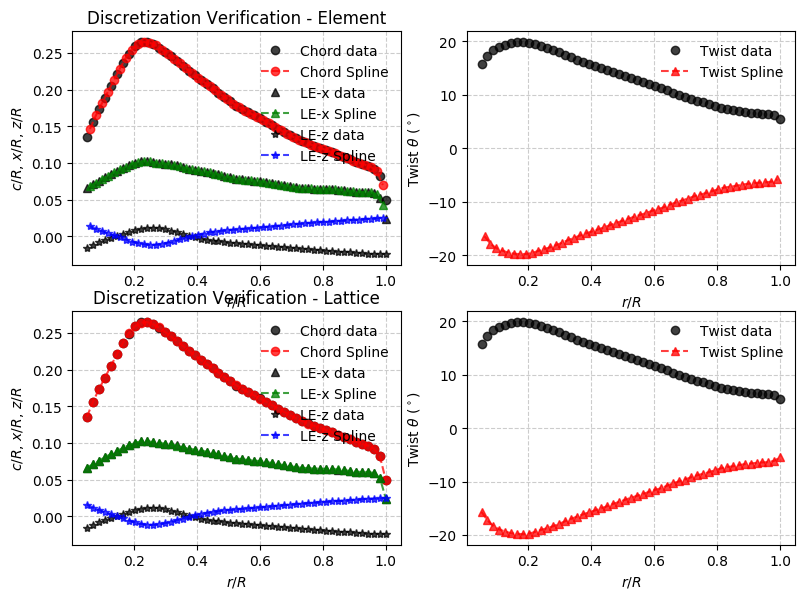

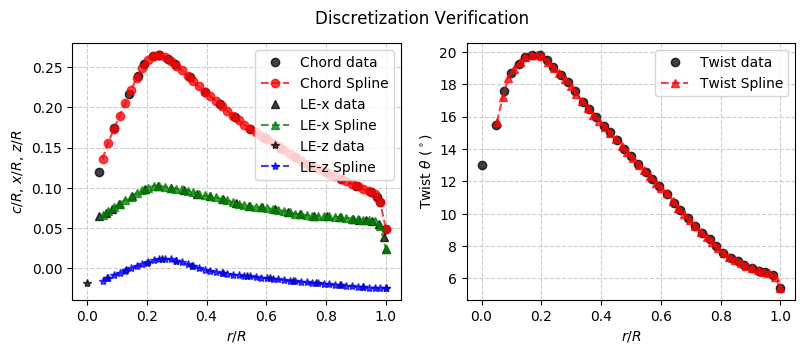

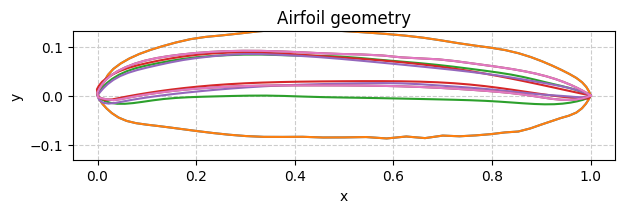

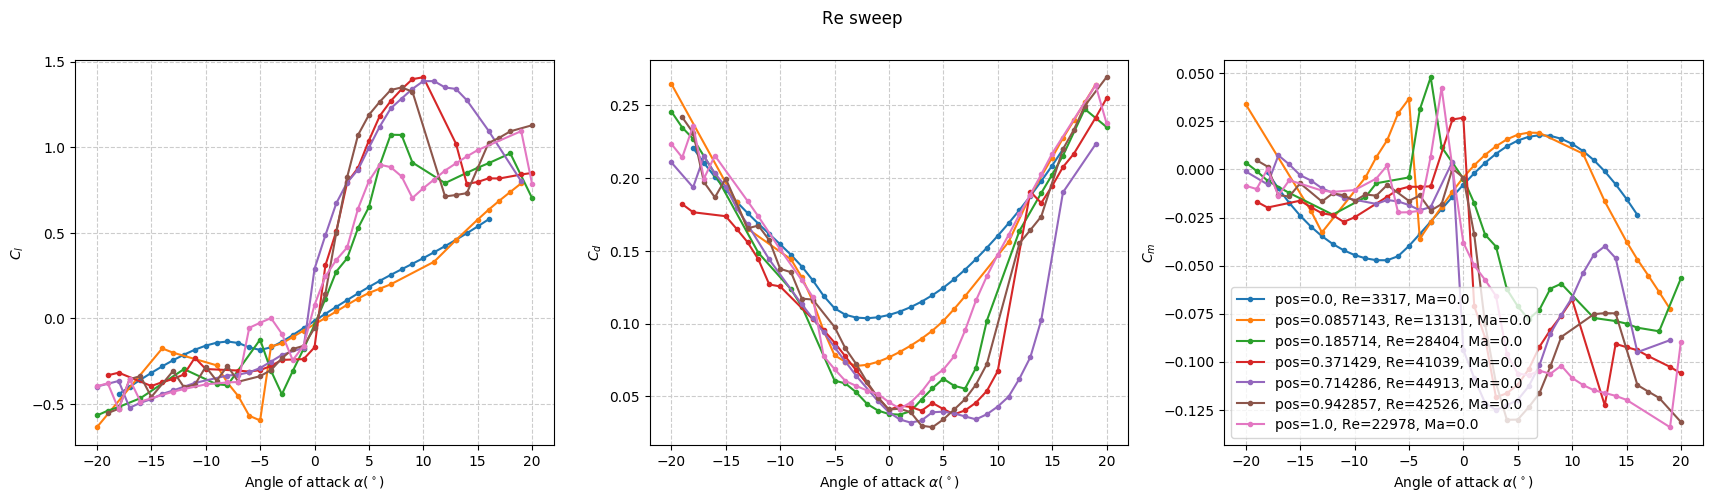

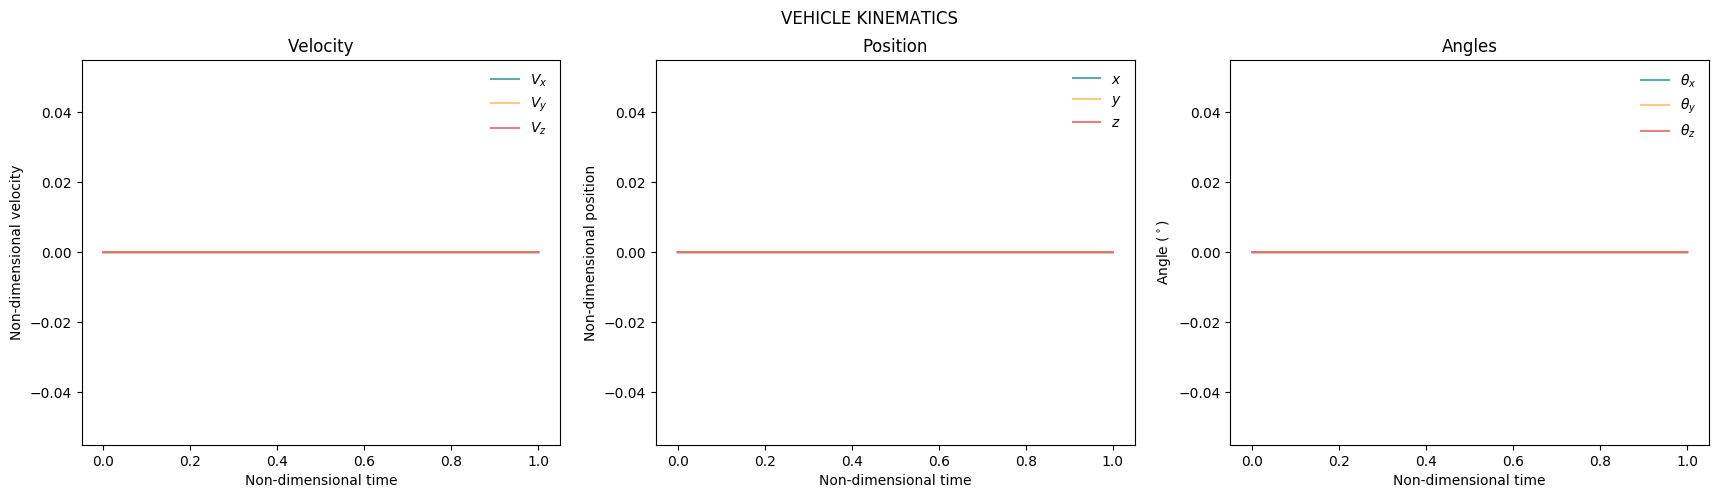

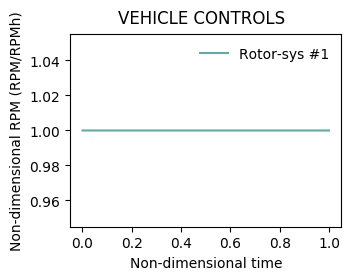

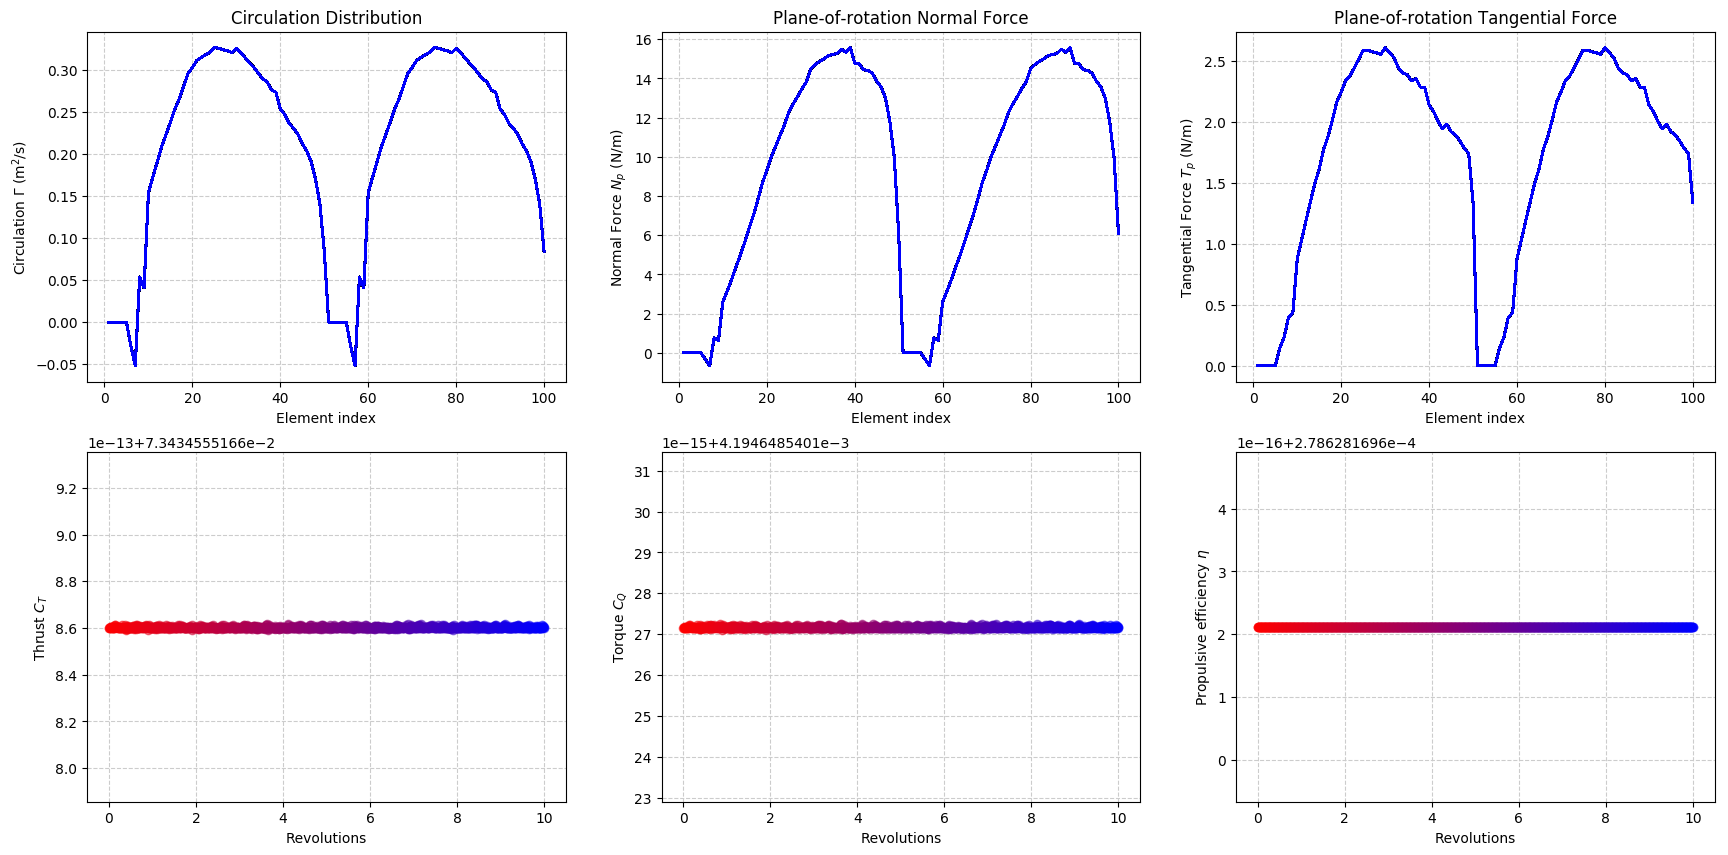

*******************************************************************
END temps/dji9443_single_bemnoise_00/singlerotor	2020-07-07T14:49:31.993
*******************************************************************
ELAPSED TIME: 0 hours 15 minutes 1 seconds


In [7]:
save_path       = "temps/dji9443_single_bemnoise_00/"  # Where to save the simulation


# ------------ PARAMETERS --------------------------------------------------
# Rotor geometry
rotor_file      = "DJI9443.csv"        # Rotor geometry
data_path       = uns.def_data_path    # Path to rotor database
pitch           = 0.0                  # (deg) collective pitch of blades
n               = 50                   # Number of blade elements
CW              = true                 # Clock-wise rotation
xfoil           = true                 # Whether to run XFOIL


# Read radius of this rotor and number of blades
R, B            = uns.read_rotor(rotor_file; data_path=data_path)[[1,3]]

# Simulation parameters
RPM             = 5400                 # RPM
J               = 0.0001               # Advance ratio Vinf/(nD)
rho             = 1.071778             # (kg/m^3) air density
mu              = 1.85508e-5           # (kg/ms) air dynamic viscosity
speedofsound    = 342.35               # (m/s) speed of sound
ReD             = 2*pi*RPM/60*R * rho/mu * 2*R   # Diameter-based Reynolds number

magVinf         = J*RPM/60*(2*R)
Vinf(X,t)       = magVinf*[1.0, 0, 0]  # (m/s) freestream velocity

# Aerodynamic solver
# VehicleType   = uns.UVLMVehicle      # Unsteady solver
VehicleType     = uns.QVLMVehicle      # Quasi-steady solver

# Solver parameters
nrevs           = 10                   # Number of revolutions in simulation
nsteps_per_rev  = 120                  # Time steps per revolution
ttot            = nrevs/(RPM/60)       # (s) total simulation time
nsteps          = nrevs*nsteps_per_rev # Number of time steps

# (Unsteady solver parameters---not used in this example)
p_per_step      = 2                    # Sheds per time step
lambda          = 2.125                # Core overlap
overwrite_sigma = lambda * 2*pi*R/(nsteps_per_rev*p_per_step) # Smoothing core size
surf_sigma      = R/10                 # Smoothing radius of lifting surface
vlm_sigma       = surf_sigma           # Smoothing radius of VLM
shed_unsteady   = true                 # Shed particles from unsteady loading
                                       # Max particles for memory pre-allocation
max_particles   = ((2*n+1)*B)*nrevs*nsteps_per_rev*p_per_step

# OUTPUT OPTIONS
run_name        = "singlerotor"
nsteps_save     = 1                    # Save vtks every this many steps
save_wopwopin   = true                 # Generate inputs for PSU-WOPWOP
prompt          = false                # Whether to promp the user
verbose         = true
plot_disc       = true                 # Plot blade discretization for debugging




# ------------ SIMULATION SETUP --------------------------------------------
# Generate rotor
rotor = uns.generate_rotor(rotor_file; pitch=pitch,
                                        n=n, CW=CW, ReD=ReD, altReD=[RPM, J, mu/rho],
                                        verbose=verbose, xfoil=xfoil,
                                        data_path=data_path,
                                        plot_disc=plot_disc)

# ----- VEHICLE DEFINITION
# System of all FLOWVLM objects
system = vlm.WingSystem()
vlm.addwing(system, "Rotor1", rotor)

# Systems of rotors
rotors = vlm.Rotor[rotor]   # Defining this rotor as its own system
rotor_systems = (rotors,)

# Wake-shedding system (don't include the rotor if quasi-steady vehicle)
wake_system = vlm.WingSystem()

if VehicleType != uns.QVLMVehicle
    vlm.addwing(wake_system, "Rotor1", rotor)
else
    # Mute colinear warnings. This is needed since the quasi-steady solver
    #   will probe induced velocities at the lifting line of the blade
    uns.vlm.VLMSolver._mute_warning(true)
end

# Define vehicle object
vehicle = VehicleType(   system;
                            rotor_systems=rotor_systems,
                            wake_system=wake_system
                         )


# ----- MANEUVER DEFINITION
RPM_fun(t) = 1.0                # RPM (normalized by reference RPM) as a
                                # function of normalized time
angle = ()                      # Angle of each tilting system (none in this case)
sysRPM = (RPM_fun, )            # RPM of each rotor system
Vvehicle(t) = zeros(3)          # Translational velocity of vehicle over Vcruise
anglevehicle(t) = zeros(3)      # (deg) angle of the vehicle

# Define Maneuver object
maneuver = uns.KinematicManeuver(angle, sysRPM, Vvehicle, anglevehicle)

# Plot maneuver path and controls
uns.plot_maneuver(maneuver; vis_nsteps=nsteps)


# ----- SIMULATION DEFINITION
RPMref = RPM
Vref = 0.0

tinit = 0.0                                  # (s) initial time
Vinit = Vref*maneuver.Vvehicle(tinit/ttot)   # (m/s) initial vehicle velocity
angle1 = maneuver.anglevehicle(tinit/ttot)   # (rad/s) initial vehicle angular velocity
angle2 = maneuver.anglevehicle(tinit/ttot + 1e-12)
Winit = pi/180 * (angle2-angle1)/(ttot*1e-12)

simulation = uns.Simulation(vehicle, maneuver, Vref, RPMref, ttot;
                                            Vinit=Vinit, Winit=Winit, t=tinit)


# ----- MONITOR DEFINITION
monitor = uns.generate_monitor_rotors( rotors, J, rho, RPM, nsteps;
                                    t_scale=RPM/60,        # Time scaling factor for plots
                                    t_lbl="Revolutions",   # x-axis label
                                    # OUTPUT OPTIONS
                                    save_path=save_path,
                                    run_name="rotor",
                                    figname="monitor_rotor",
                                    disp_conv=verbose,)


# ------------ RUN SIMULATION ----------------------------------------------
pfield = uns.run_simulation(simulation, nsteps;
                                  # SIMULATION OPTIONS
                                  Vinf=Vinf,
                                  rho=rho,
                                  mu=mu,
                                  sound_spd=speedofsound,
                                  # SOLVERS OPTIONS
                                  p_per_step=p_per_step,
                                  overwrite_sigma=overwrite_sigma,
                                  vlm_sigma=vlm_sigma,
                                  surf_sigma=surf_sigma,
                                  max_particles=max_particles,
                                  shed_unsteady=shed_unsteady,
                                  extra_runtime_function=monitor,
                                  # OUTPUT OPTIONS
                                  save_path=save_path,
                                  run_name=run_name,
                                  nsteps_save=nsteps_save,
                                  save_wopwopin=save_wopwopin,
                                  prompt=prompt,
                                  verbose=verbose,
                             );     

In [8]:
8.6*1e-13 + 7.343455e-2

0.07343455000086001

## Step 2: Aeroacoustic Solution &ndash; Tonal Noise

In this step, we feed the aerodynamic solution to PSU-WOPWOP and run it to obtain tonal noise in a circular array of microphones located at 1.905 m from the rotor hub as shown below.

<img src="vid/ransnoise_dji9443_single_new01_00_2.gif" alt="Vid here" width="500px">

In [11]:
# Path from where to read aerodynamic solution
read_path       = pwd()*"/temps/dji9443_single_bemnoise_00/"
# Path where to save PSU-WOPWOP's outputs
save_path       = "temps/dji9443_single_bemnoise_00_psw00/"
# Path to PSU-WOPWOP binary (not included in FLOWUnsteady)
wopwopbin       = "/home/edoalvar/Dropbox/FLOWResearch/OtherCodes/PSU-WOPWOP_v3.4.3_B3385/wopwop3_serial"
# Run name (prefix of rotor files to read)
run_name        = "singlerotor"

# ------------ PARAMETERS --------------------------------------------------
# NOTE: Make sure that these parameters match what was used in the 
#       aerodynamic solution.

# Rotor geometry
rotor_file      = "DJI9443.csv"        # Rotor geometry
data_path       = uns.def_data_path    # Path to rotor database

# Read radius of this rotor and number of blades
R, B            = uns.read_rotor(rotor_file; data_path=data_path)[[1,3]]

rotorsystems    = [[B]]                # rotorsystems[si][ri] is the number of blades of the ri-th rotor in the si-th system

# Simulation parameters
RPM             = 5400                 # RPM is just a reference value to go from nrevs to simulation time
rho             = 1.071778             # (kg/m^3) air density
speedofsound    = 342.35               # (m/s) speed of sound

# Solver parameters
ww_nrevs        = 9                    # Number of revolutions in PSU-WOPWOP
ww_nsteps_per_rev = 120                # Number of steps per revolution in PSU-WOPWOP
periodic        = true                 # Periodic aerodynamic solution

# Observer definition: Circular array of microphones
sph_R           = 1.905                # (m) radial distance from rotor hub
sph_nR          = 0
sph_nphi        = 0
sph_ntht        = 360                  # Number of microphones
sph_thtmin      = 0                    # (deg) first microphone's angle
sph_thtmax      = 360                  # (deg) last microphone's angle
sph_phimax      = 180
sph_rotation    = [90, 0, 0]           # Rotation of grid of microphones
obs_name = "circle_mic_array"          # Observer file name

# Observer definition: Single microphone
Rmic = 1.905                           # (m) radial distance from rotor hub
anglemic = 90*pi/180                   # (rad) microphone angle from plane of rotation (- below, + above)
                                       # 0deg is at the plane of rotation, 90deg is upstream
microphoneX = nothing                  # Comment and uncomment this to switch from array to single microphone
# microphoneX = Rmic*[-sin(anglemic), cos(anglemic), 0]


# ------------ RUN PSU-WOPWOP ----------------------------------------------
uns.run_noise_wopwop(read_path, run_name, RPM, rho, speedofsound, rotorsystems, 
                        ww_nrevs, ww_nsteps_per_rev, save_path, wopwopbin;
                        # ---------- OBSERVERS -------------------------
                        sph_R=sph_R,
                        sph_nR=sph_nR, sph_ntht=sph_ntht,
                        sph_nphi=sph_nphi, sph_phimax=sph_phimax,
                        sph_rotation=sph_rotation,
                        sph_thtmin=sph_thtmin, sph_thtmax=sph_thtmax,
                        microphoneX=microphoneX,
                        # ---------- SIMULATION OPTIONS ----------------
                        periodic=periodic,
                        # ---------- INPUT OPTIONS ---------------------
                        num_min=1,                      # Start reading loading files from this number
                        # ---------- OUTPUT OPTIONS --------------------
                        verbose=true, v_lvl=0,
                        prompt=false, debug_paraview=false,
                        debuglvl=1,                     # WW debug level
                        observerf_name="observergrid",  # .xyz file with observer grid
                        case_name="runcase",            # Name of case to create and run
                        )

Creating work directory...
Creating spherical observer grid...
Generating WOPWOP geometry files... (reading num range 1:1081)
	file singlerotor_Rotor1_Blade1_loft...


┌ Warning: Running periodic solution. Make sure that loading is indeed periodic
└ @ FLOWUnsteady /home/edoalvar/Dropbox/FLOWResearch/FLOWCodes/FLOWUnsteady/src/FLOWUnsteady_noise.jl:91


	file singlerotor_Rotor1_Blade2_loft...
	file singlerotor_Sys1_Rotor1_Blade1_compact...
	file singlerotor_Sys1_Rotor1_Blade2_compact...
Generating WOPWOP loading files...
Running PSU-WOPWOP...
********** PSU-WOPWOP Version 3.4.3 (PSU Internal Build 3385 [locally modified]) ***********
  
 *****************************************************************
 ***  Reading case file: ./runcase/runcase.nam
 *****************************************************************
          Defaulting nbObserverContainers in the Environment in 
          namelist to 1
          This may be a VERY large file.
 Environment Created
 Case Setup Time =   0.462599999998929     
 Computing noise for ObserverContainer
 Grid point:    1 of   360
 At Location:    0.00000       -1.90500        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:    2 of   360
 At Locati

     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:   30 of   360
 At Location:  -0.923562       -1.66615        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:   31 of   360
 At Location:  -0.952500       -1.64978        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:   32 of   360
 At Location:  -0.981148       -1.63290        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:   33 of   360
 At Location:   -1.00950       -1.61553        0.00000    
   Integrating Generic Container

     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:   62 of   360
 At Location:   -1.66615      -0.923562        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:   63 of   360
 At Location:   -1.68201      -0.894343        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:   64 of   360
 At Location:   -1.69737      -0.864852        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:   65 of   360
 At Location:   -1.71220      -0.835097        0.00000    
   Integrating Generic Container

     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:   94 of   360
 At Location:   -1.90239       0.997000E-01    0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:   95 of   360
 At Location:   -1.90036       0.132886        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:   96 of   360
 At Location:   -1.89775       0.166032        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:   97 of   360
 At Location:   -1.89456       0.199127        0.00000    
   Integrating Generic Container

     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  126 of   360
 At Location:   -1.56049        1.09266        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  127 of   360
 At Location:   -1.54118        1.11973        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  128 of   360
 At Location:   -1.52140        1.14646        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  129 of   360
 At Location:   -1.50116        1.17283        0.00000    
   Integrating Generic Container

     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  158 of   360
 At Location:  -0.744343        1.75356        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  159 of   360
 At Location:  -0.713626        1.76628        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  160 of   360
 At Location:  -0.682691        1.77847        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  161 of   360
 At Location:  -0.651548        1.79011        0.00000    
   Integrating Generic Container

     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  190 of   360
 At Location:   0.298008        1.88155        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  191 of   360
 At Location:   0.330800        1.87606        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  192 of   360
 At Location:   0.363491        1.87000        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  193 of   360
 At Location:   0.396072        1.86337        0.00000    
   Integrating Generic Container

     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  222 of   360
 At Location:    1.24979        1.43772        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  223 of   360
 At Location:    1.27469        1.41569        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  224 of   360
 At Location:    1.29921        1.39323        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  225 of   360
 At Location:    1.32332        1.37034        0.00000    
   Integrating Generic Container

     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  254 of   360
 At Location:    1.82176       0.556968        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  255 of   360
 At Location:    1.83120       0.525089        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  256 of   360
 At Location:    1.84009       0.493050        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  257 of   360
 At Location:    1.84841       0.460861        0.00000    
   Integrating Generic Container

     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  286 of   360
 At Location:    1.84009      -0.493050        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  287 of   360
 At Location:    1.83120      -0.525089        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  288 of   360
 At Location:    1.82176      -0.556968        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  289 of   360
 At Location:    1.81176      -0.588677        0.00000    
   Integrating Generic Container

     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  318 of   360
 At Location:    1.29921       -1.39323        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  319 of   360
 At Location:    1.27469       -1.41569        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  320 of   360
 At Location:    1.24979       -1.43772        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  321 of   360
 At Location:    1.22451       -1.45931        0.00000    
   Integrating Generic Container

     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  350 of   360
 At Location:   0.363491       -1.87000        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  351 of   360
 At Location:   0.330800       -1.87606        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  352 of   360
 At Location:   0.298008       -1.88155        0.00000    
   Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
     Integrating Generic Container
 Grid point:  353 of   360
 At Location:   0.265125       -1.88646        0.00000    
   Integrating Generic Container

grid (generic function with 1 method)

## Optional Step: Processing VTKs

When debugging things, I like to convert the PSU-WOPWOP's inputs back to vtk and visualize them in Paraview. This helps verify that we are passing the right things to PSU-WOPWOP. In order to do that, the following lines grab those inputs files that are formated for PSU-WOPWOP and converts them into vtk files.

In [12]:
read_path = "temps/dji9443_single_bemnoise_00_psw00/runcase/" # Path to PSW's input files
save_path = read_path*"../vtks/"                              # Where to save VTK files

# Create save path
noise.gt.create_path(save_path, true)

# Identify loft and compact PSW files
wopfiles = [fname for fname in readdir(read_path)
            if occursin("loft.wop", fname) || occursin("compact.wop", fname)]

vtk_str = "$save_path/"
            
for fname in wopfiles
    
    println("*"^73)
    println("*\t\tREADING $fname")
    println("*"^73)

    # Identifies loading file if compact patch
    if occursin("compact.wop", fname)
        lfname = fname[1:findfirst("compact.wop", fname)[1]-1]*"loading_periodic.wop"
    else
        lfname = nothing
    end

    # Convert from PSW to VTK
    vtk_str *= noise.geomwopwop2vtk(fname; read_path=read_path,
                                loading_file=lfname, verbose=true,
                                save_path=save_path)[end]
end

println("Generated the following files:\n\t$(vtk_str)")

*************************************************************************
*		READING singlerotor_Rotor1_Blade1_loft.wop
*************************************************************************
Int32[42]	 # Magic number
Int32[1, 0]	 # Version
N/m^2                           	 # Units
Geometry input file for PSU-WOPWOP (Format v1.0)
------------------------------------------------
Created by FLOWNoise (written by Eduardo Alvarez)
https://github.com/byuflowlab/FLOWNoise
Creation date: 2020-07-07T15:41:43.596
Units: SI
Format: Unstructured grid, face-centered                                                                                                                                                                                                                                                                                                                                                                                                                                                      

Generated the following files:
	temps/dji9443_single_bemnoise_00_psw00/runcase/../vtks//singlerotor_Rotor1_Blade1_loft_vtkpatch...vtk;singlerotor_Rotor1_Blade2_loft_vtkpatch...vtk;singlerotor_Sys1_Rotor1_Blade1_compact_vtkcompactpatch...vtk;singlerotor_Sys1_Rotor1_Blade2_compact_vtkcompactpatch...vtk;


## Step 3: Aeroacoustic Solution &ndash; Broadband Noise

In [5]:
# Path where to save BPM's outputs
save_path       = "temps/dji9443_single_bemnoise_00_bpm00/"

# ------------ PARAMETERS --------------------------------------------------
# NOTE: Make sure that these parameters match what was used in the 
#       aerodynamic solution.

# Rotor geometry
rotor_file      = "DJI9443.csv"        # Rotor geometry
data_path       = uns.def_data_path    # Path to rotor database
pitch           = 0.0                  # (deg) collective pitch of blades
n               = 50                   # Number of blade elements
CW              = true                 # Clock-wise rotation


# Read radius of this rotor and number of blades
R, B            = uns.read_rotor(rotor_file; data_path=data_path)[[1,3]]

# Simulation parameters
RPM             = 5400                 # RPM
J               = 0.0001               # Advance ratio Vinf/(nD)
rho             = 1.071778             # (kg/m^3) air density
mu              = 1.85508e-5           # (kg/ms) air dynamic viscosity
speedofsound    = 342.35               # (m/s) speed of sound

magVinf         = J*RPM/60*(2*R)
Vinf(X,t)       = magVinf*[1.0, 0, 0]  # (m/s) freestream velocity

# BPM parameters
noise_correction= 0.5                  # Calibration parameter
TE_thickness    = 16.0                 # (deg) trailing edge thickness
freq_bins       = uns.BPM.default_f    # Frequency bins (default is one-third octave band)

# Observer definition: Circular array of microphones
sph_R           = 1.905                # (m) radial distance from rotor hub
sph_nR          = 0
sph_nphi        = 0
sph_ntht        = 360                  # Number of microphones
sph_thtmin      = 0                    # (deg) first microphone's angle
sph_thtmax      = 360                  # (deg) last microphone's angle
sph_phimax      = 180
sph_rotation    = [90, 0, 0]           # Rotation of grid of microphones

# Observer definition: Single microphone
Rmic = 1.905                           # (m) radial distance from rotor hub
anglemic = 90*pi/180                   # (rad) microphone angle from plane of rotation (- below, + above)
                                       # 0deg is at the plane of rotation, 90deg is upstream
microphoneX = nothing                  # Comment and uncomment this to switch from array to single microphone
# microphoneX = Rmic*[-sin(anglemic), cos(anglemic), 0]

# OUTPUT OPTIONS
run_name        = "singlerotor"        # Suffix of output file names
prompt          = true                 # Whether to promp the user
verbose         = false
plot_disc       = false                 # Plot blade discretization for debugging

# ------------ GENERATE GEOMETRY -------------------------------------------
# Generate rotor
rotor = uns.generate_rotor(rotor_file; pitch=pitch,
                                        n=n, CW=CW, ReD=0.0,
                                        verbose=verbose, xfoil=false,
                                        data_path=data_path,
                                        plot_disc=plot_disc)
rotors = vlm.Rotor[rotor]

# ------------ RUN BPM -----------------------------------------------------
uns.run_noise_bpm(rotors, RPM, Vinf, rho, mu, speedofsound,
                                save_path;
                                # ---------- OBSERVERS -------------------------
                                sph_R=sph_R,
                                sph_nR=sph_nR, sph_ntht=sph_ntht,
                                sph_nphi=sph_nphi, sph_phimax=sph_phimax,
                                sph_rotation=sph_rotation,
                                sph_thtmin=sph_thtmin, sph_thtmax=sph_thtmax,
                                microphoneX=microphoneX,
                                # ---------- BPM OPTIONS -----------------------
                                noise_correction=noise_correction,
                                TE_thickness=TE_thickness,
                                freq_bins=freq_bins,
                                # ---------- OUTPUT OPTIONS --------------------
                                prompt=prompt,
                                run_name=run_name,
                                );



Folder temps/dji9443_single_bemnoise_00_bpm00/ already exists. Remove? (y/n) stdin> y




## Step 4: Processing Results

### Read Data

In [ ]:
# Dataset to read and associated information
dataset_infos = [   # (label, PSW solution, BPM solution, BPM freq bins, line style, color)
                    ("BEMT", "temps/dji9443_single_bemnoise_00_psw00/runcase/", 
                             "temps/dji9443_single_bemnoise_00_bpm00", 
                                                               uns.BPM.default_f, "-", "r")
                ];

datasets = Dict()     # Stores data in this dictionary

# Read each dataset
for (lbl, psw_read_path, bpm_read_path) in dataset_infos
    
    datasets[lbl] = noise.fetch_pswdataset(psw_read_path)
    
end

display(datasets)